## MNIST Using Convolutional Neural Networks

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../../Dataset/MNIST/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train = train.fillna(0)

In [5]:
y = train.label.values
print y.shape

(42000,)


In [6]:
train.drop(labels=['label'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


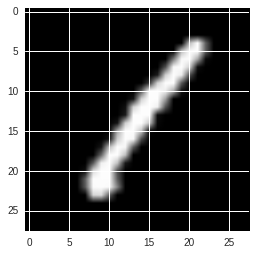

In [10]:
train = train/255.0
img = train.iloc[0,:]
plt.imshow(img.reshape(28,28),cmap='gray')

In [11]:
X = train.values
print X.shape

(42000, 784)


In [12]:
X = X.reshape(42000,1,28,28)
print X.shape

(42000, 1, 28, 28)


In [31]:
y = to_categorical(y)

In [32]:
from sklearn.cross_validation import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.33,random_state=42)
print X_train.shape,y_train.shape
print X_cv.shape,y_cv.shape

(28140, 1, 28, 28) (28140, 10)
(13860, 1, 28, 28) (13860, 10)


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D


In [34]:
model = Sequential()
# this applies 32 convolution filters of size 3x3 each.
model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# Note: Keras does automatic shape inference.
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad')

In [36]:
model.fit(X_train, y_train, batch_size=32, nb_epoch=1)

Epoch 1/1
28140/28140 [==============================] - 102s - loss: 2.3021   


In [38]:
print model.evaluate(X_cv,y_cv)

13860/13860 [==============================] - 19s    
2.30128863075
